In [ ]:
"""
(10) Regressão com KNN

Aplique KNN para realizar uma tarefa de regressão em um conjunto de dados como
Airfoil Self-Noise. Compare o desempenho do modelo com a regressão linear usando
MSE.
__________________________________________________________________________________________

10. Regression with KNN

Apply KNN to perform a regression task on a dataset such as Airfoil Self-Noise.
Compare the model's performance with linear regression using MSE.

"""

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
!pip install ucimlrepo

In [7]:
# fetch dataset
airfoil_self_noise = fetch_ucirepo(id=291)

# data (as pandas dataframes)
X = airfoil_self_noise.data.features
y = airfoil_self_noise.data.targets

# metadata
print(airfoil_self_noise.metadata)

# variable information
print(airfoil_self_noise.variables)

{'uci_id': 291, 'name': 'Airfoil Self-Noise', 'repository_url': 'https://archive.ics.uci.edu/dataset/291/airfoil+self+noise', 'data_url': 'https://archive.ics.uci.edu/static/public/291/data.csv', 'abstract': 'NASA data set, obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1503, 'num_features': 5, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['scaled-sound-pressure'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5VW2C', 'creators': ['Thomas Brooks', 'D. Pope', 'Michael Marcolini'], 'intro_paper': None, 'additional_info': {'summary': 'The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of

In [10]:
x = airfoil_self_noise.data.features
y = airfoil_self_noise.data.targets

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# RESULT 1: KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Predicting
y_pred_knn = knn_model.predict(x_test)

# KNN-TRAINED MODEL MSE
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("KNN-TRAINED MODEL MSE:")
print(mse_knn)

KNN-TRAINED MODEL MSE:
41.26571271760797


In [16]:
# RESULT 2: LINEAR REGRESSION
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
print("LINEAR REGRESSION-TRAINED MODEL MSE:")
print(mse_linear)

LINEAR REGRESSION-TRAINED MODEL MSE:
22.128643318247285


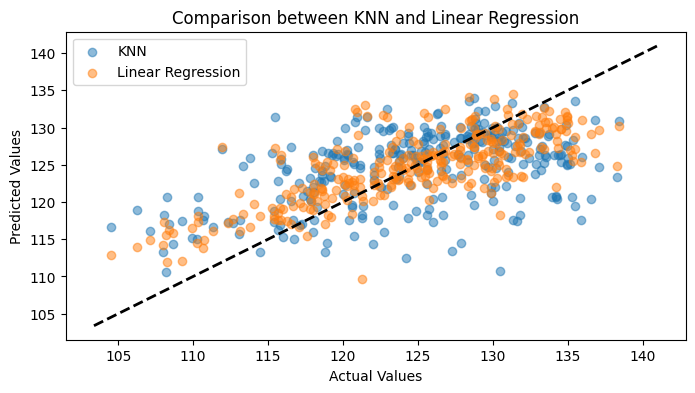

In [20]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_knn, label='KNN', alpha=0.5)
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison between KNN and Linear Regression')
plt.legend()
plt.show()

In [ ]:
# DOTS CLOSER TO THE LINE = BETTER RESULTS

In [ ]:
# Since the MSE of Linear Regression is smaller than that of the KNN model,
# this indicates that the Linear Regression model is making more accurate predictions
# (with lower error) on the test dataset. Remember that lower MSE means the model
# predictions are closer to the actual values. Therefore, in the context of this
# comparison, Linear Regression is working better than KNN.